# Módulo 10: Descritiva II - Análise descritiva para resposta contínua

# Exercício 3 - Distribuição de variáveis qualitativas no tempo

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [114]:
# importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline


In [115]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('PREVISAO_DE_RENDA.csv')
df_previsao = pd.DataFrame(arquivo)


# informações sobre os dados

df_previsao.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [116]:
# fazendo a conversão de dados

df_previsao['data_ref'] = pd.to_datetime(df_previsao['data_ref'], errors='coerce')
df_previsao['data_ref_float'] = df_previsao['data_ref'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


df_previsao['sexo'] = df_previsao['sexo'].replace({'F': 1, 'M': 0})

In [117]:
# separando dados númericos para consulta e colunas dispensáveis

df_previsao = df_previsao.select_dtypes(exclude=['object'])
df_previsao = df_previsao.drop('Unnamed: 0', axis=1, errors='ignore')
df_previsao = df_previsao.drop('index', axis=1, errors='ignore')

df_previsao.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda',
       'data_ref_float'],
      dtype='object')

In [118]:
# correlação entre as variáveis

df_previsao.corr()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,data_ref_float
data_ref,1.000000,0.001992,0.002405,0.003610,0.015598,-0.004329,-0.002197,0.016489,0.018797,0.007716,1.000000
sexo,0.001992,1.000000,-0.373288,0.044192,-0.126175,0.218183,0.146123,-0.159661,-0.010563,-0.180722,0.001992
posse_de_veiculo,0.002405,-0.373288,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.002405
posse_de_imovel,0.003610,0.044192,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.003610
qtd_filhos,0.015598,-0.126175,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.015598
idade,-0.004329,0.218183,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,-0.004329
tempo_emprego,-0.002197,0.146123,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,-0.002197
qt_pessoas_residencia,0.016489,-0.159661,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.016489
mau,0.018797,-0.010563,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,0.018797
renda,0.007716,-0.180722,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.007716


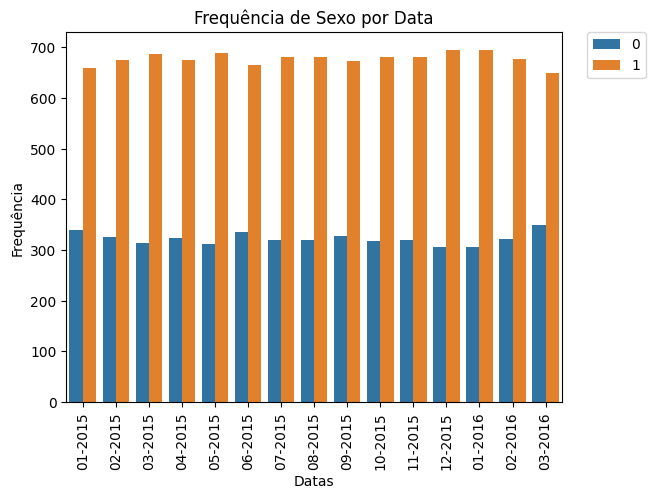

In [119]:
# frequência de "sexo" por "data_ref"


ax = sns.countplot(x='data_ref',  hue = 'sexo', data=df_previsao)
tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()


ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
labels = ax.set_xticklabels(tick_labs, rotation=90)


plt.xlabel('Datas')
plt.ylabel('Frequência')
plt.title('Frequência de Sexo por Data')
plt.show()


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

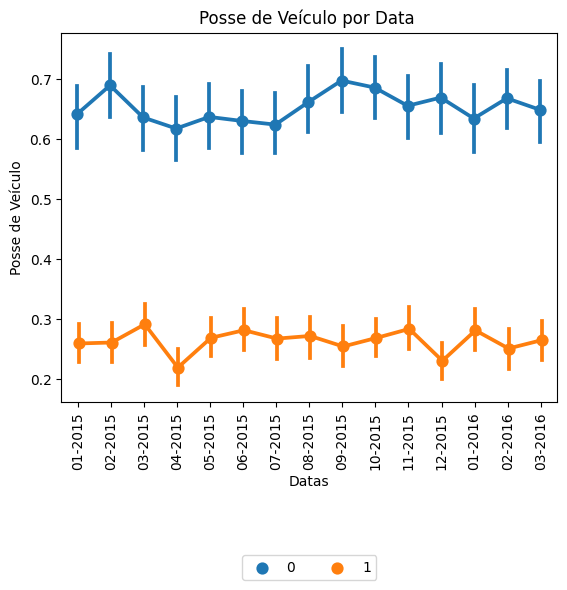

In [122]:
# variável "posse_de_veiculo" por "sexo" durante um período de tempo

ax = sns.pointplot(x="data_ref", y="posse_de_veiculo", hue = 'sexo',
                   data=df_previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


plt.xlabel('Datas')
plt.ylabel('Posse de Veículo')
plt.title('Posse de Veículo por Data ')
plt.show()

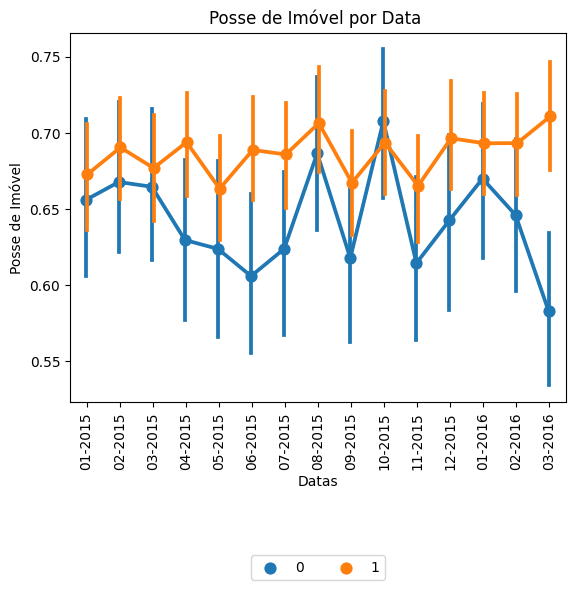

In [130]:
# variável "posse_de_imovel" por "sexo" durante um período de tempo

ax = sns.pointplot(x="data_ref", y="posse_de_imovel", hue = 'sexo',
                   data=df_previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


plt.xlabel('Datas')
plt.ylabel('Posse de Imóvel')
plt.title('Posse de Imóvel por Data ')
plt.show()

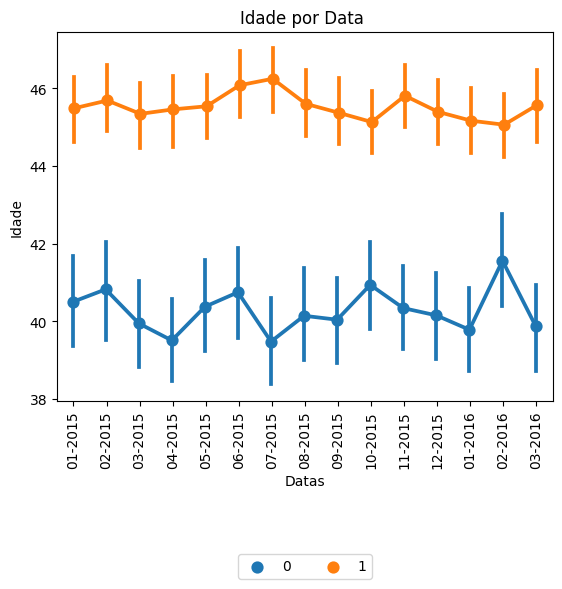

In [131]:
# variável "idade" por "sexo" durante um período de tempo

ax = sns.pointplot(x="data_ref", y="idade", hue = 'sexo',
                   data=df_previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


plt.xlabel('Datas')
plt.ylabel('Idade')
plt.title('Idade por Data ')
plt.show()

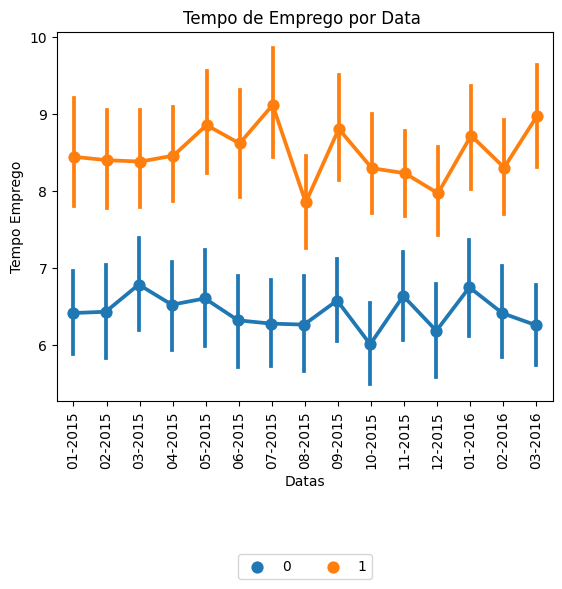

In [133]:
# variável "tempo_emprego" por "sexo" durante um período de tempo

ax = sns.pointplot(x="data_ref", y="tempo_emprego", hue = 'sexo',
                   data=df_previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


plt.xlabel('Datas')
plt.ylabel('Tempo Emprego')
plt.title('Tempo de Emprego por Data ')
plt.show()

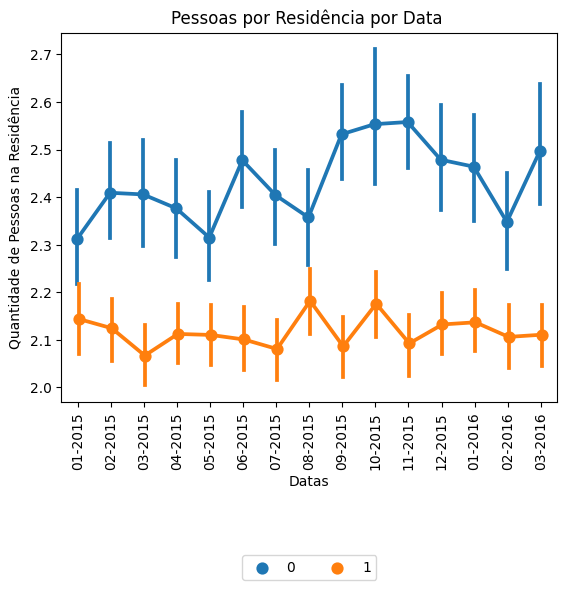

In [135]:
# variável "qt_pessoas_residencia" por "sexo" durante um período de tempo

ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia", hue = 'sexo',
                   data=df_previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


plt.xlabel('Datas')
plt.ylabel('Quantidade de Pessoas na Residência')
plt.title('Pessoas por Residência por Data ')
plt.show()

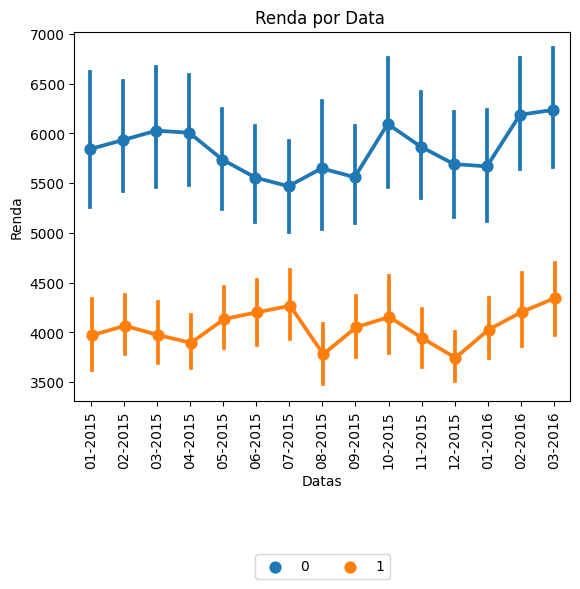

In [137]:
# variável "renda" por "sexo" durante um período de tempo

ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=df_previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = df_previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df_previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)


plt.xlabel('Datas')
plt.ylabel('Renda')
plt.title('Renda por Data ')
plt.show()

**Resposta:** 
- As variável são estáveis ao longo do tempo. A estabilidade permite que possamos utilizar estas variáveis para construir os nossos modelos.

**Análise das Variáveis":**
- A variável **"sexo"** é relativamente estável, ou seja, o sexo 1 (feminino) e o sexo 0 (masculino) seguem comportamentos estáveis com as variáveis testadas. Baseado nos dados podemos citar algumas características das variáveis:

- **“data_ref”:** a quantidade de feminino e masculino se mantém com o tempo;
- **“posse_de_veiculo”:** as quantidade se mantém ao longo do tempo para feminino e masculino. Mulheres possuem menos carros em média do que homens.
- **"posse_de_imovel”:** no caso das mulheres se mantém com o tempo, já no caso dos homens há uma pequena oscilação para mais em 08/2015 e 10/2015. As mulheres tendem a ter mais imóveis do que os homens.
- **“idade”:** a quantidade se mantém ao longo do tempo. As mulheres têm um média de idade maior do que dos homens. No caso delas gira em torno de 46 anos enquanto para eles a média gira em torno de 40 anos.
- **“tempo_de_emprego”:** a quantidade se mantém ao longo do tempo. As mulheres têm uma média de tempo de emprego maior do que dos homens. No caso delas gira em torno de 8.5 anos e no caso deles gira em torno de 6.5 anos. 
- **“qt_pessoas_residencia”:** a quantidade se mantém estável com o tempo. As mulheres têm em média a quantidade de pessoas na residência menor que os homens. No caso das mulheres gira em torno de 2 pessoas. No caso dos homens a média é um pouco maior e gira em torno de 2.4 pessoas na residência. 
- **“renda”:** a quantidade de mantém estável com o tempo.  As mulheres têm uma média menor de salário do que os homens. Elas ganham em média 4000 enquanto eles ganham 6000. Ou seja, as mulheres ganham 2/3 dos salários dos homens.
